<a href="https://colab.research.google.com/github/xumeiying/Stats_II/blob/master/Stats_II_Probset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 2 GOV 391L, Spring 2020

In [0]:
# load packages
import numpy as np
import pandas as pd
from pandas import DataFrame
import math 

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
from matplotlib import rc
import seaborn as sns

## Q1

---


Write  a  1-2  paragraph  description  of  your  proposed  final  project.   This  should  include  aresearch  question,  a  hypothesis,  and  a  brief  description  of  the  data  you  will  use  as  wellas the citation and brief summary of the original article you intend to replicate.  Althoughthe project involves a replication assignment, the focus should be on your proposed exten-sion/contribution to the scientific literature. See King (2006).

## Q2 
---
Load the `“wine.txt”` file on Canvas into `R`. This dataset gives the prices of 27 wines (`PRICE`), along with the year they were harvested (`VINTAGE`), the average temperature during theirgrowing season (`TEMP`), the total rainfall in milliliters during the growing season (`RAIN1`), the total rainfall during the previous winter (`RAIN2)` and the ages of each wine at the time the prices were recorded in 1983 (`AGE`). `LPRICE` is the logged price of each wine, which we’re ignoring for now.
- (a)  Create a table of summary statistics for `PRICE`, `TEMP`, `RAIN1`, `RAIN2` and `AGE` that includes the min and max values of each variable as well as the median and mean.
- (b)  Plot price against average temperature, rainfall in the growing season, rainfall in theprevious winter, and age of wine and write a hypothesis regarding one of the variables.
- (c)  Regress price on average temperature,  rainfall in the growing season,  rainfall in theprevious  winter,  and  age  of  wine.   Report  the  results  as  you  would  in  an  empirical paper. (Think about what should be included in a results table.)
- (d)  Test your hypothesis from part b.
- (e)  What can you conclude about the effect of each of these factors on price?
- (f)  What does the regression output tell you about the fit of your model?
- (g)  What is the predicted price for a ten year old bottle of wine from a year with average temperature and no rain (in either measure)?
- (h)  Plot the predicted prices for wines as a function of their ages, holding all other variablesin the regression at their means.



---


### (a) Table of summary statistics
| Statistics   | PRICE    | TEMP     | RAIN1   |RAIN2   |AGE     |
|-------------:|:--------:| :-------:|: ------:|:------:|:-------:|
|min           |0.101     |14.98     |38.00    |376.0000|3.0000  |
|max           |1.000     |17.65     |292.00   |8.3.00  |31.00   |
|mean          |0.2878    |16.4781   |144.8148 |608.4074|16.1852 |
|median        |0.2210    |16.4200   |123.00   |600.000 |16.00   |


### (b)(c)(d) model and hypothesis testing

I plot price against average temperature, rainfall in the growing season, rainfall in theprevious winter, and age of wine. 
![Price](https://drive.google.com/uc?id=1--2q7o3KhTUAQc2_LCNuT-x4hWDEkK3y)
I construct the following model: $$Price = \beta_{0} + \beta_{1}TEMP + \beta_{2}RAIN1 + \beta_{3}RAIN2 + \beta_{4}AGE $$
I then test the hypothesis at $\alpha = 0.001$ significance level:
$$H_{0}: \beta_{4} = 0 $$
$$H_{A}: \beta_{4} \neq 0$$
Regression table

![wine table](https://drive.google.com/uc?id=1KtwpRiAN7a1Y_gVSBKSjOzW3aK-vw6LJ)


I fail to reject the null hypothesis, and the coefficient $\beta_{4}$ is not statistically significant at $\alpha = 0.001$ significance level. 

### (e)(f)
The price of wine (`PRICE`) is _positively_ associated with the average temperature during their growing season (`TEMP`), the total rainfall during the previous winter (`RAIN2`) and the ages of each wine at the time the prices were recorded in 1983 (`AGE`), but _negatively_ associated with the total rainfall in milliliters during the growing season (`RAIN1`)
- One degree increae in the average temperature during their growing season is on average associated with 0.19 unit of currency increase in the wine price; 
- One unit increase in the the total rainfall in milliliters during the growing season on average result in 0.001 unit of currency drop in the wine price; 
- One unit increase in the the the total rainfall during the previous winter on average result in  0.0006 unit of currency increase in the wine price; 
- One year increase in the ages of each wine at the time the prices were recorded in 1983 is on average associated with 0.0081 unit of currency increase in the wine price.

My model has a good fit as it explains 73.6% of variations in `price`. Adjusted for the number of variables it still explains 68.7% of variations in `price`.

### (g)(h)
The predicted price for a ten year old bottle of wine from a year with average temperature and no rain (in either measure) is 0.04484

Plugging in the predicted value of $\beta_{0}, \beta_{1}, \beta_{2}, \beta_{3}, \beta_{4}$ and the mean of `TEMP, RAIN1, RAIN2`, we can calculate 

$$PRICE = -3.1716 + 0.0081* AGE + 0.1903 * 16.478148 - 0.001 * 144.814815 + 0.0006 * 608.407407$$

The predicted prices for wines as a function of their ages, holding all other variablesin the regression at their means is plotted as follows

![image](https://drive.google.com/uc?id=1H-OCvOvv7T3wu1_Bg4jf5LttmTtH0523)

Code starts below.

---


In [78]:
wine_data =  pd.read_csv("/content/drive/My Drive/Colab Notebooks/Stat_II_probsets/wine.csv")
wine_data.head(5)

,VINTAGE,PRICE,TEMP,RAIN1,RAIN2,AGE,CN,ST LPRICE
0,1952,0.368,17.12,160,600,31,1,-0.999672
1,1953,0.635,16.73,80,690,30,1,-0.454130
2,1955,0.446,17.15,130,502,28,1,-0.807436
3,1957,0.221,16.13,110,420,26,1,-1.509593
4,1958,0.180,16.42,187,582,25,1,-1.714798


In [79]:
# summary statistics
wine_data.describe()

,VINTAGE,PRICE,TEMP,RAIN1,RAIN2,AGE,CN,ST LPRICE
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.000000
mean,1966.814815,0.287741,16.478148,144.814815,608.407407,16.185185,1.0,-1.452300
std,8.246384,0.210359,0.659260,73.065849,129.034956,8.246384,0.0,0.634880
min,1952.000000,0.101000,14.980000,38.000000,376.000000,3.000000,1.0,-2.292635
25%,1960.500000,0.137500,16.150000,88.000000,543.500000,9.500000,1.0,-1.984190
50%,1967.000000,0.221000,16.420000,123.000000,600.000000,16.000000,1.0,-1.509593
75%,1973.500000,0.349500,17.010000,185.500000,705.500000,22.500000,1.0,-1.052655
max,1980.000000,1.000000,17.650000,292.000000,830.000000,31.000000,1.0,0.000000


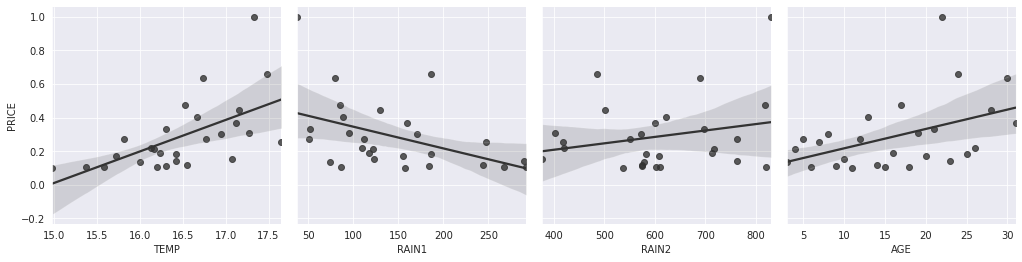

In [80]:
# plot data
wine_g = sns.PairGrid(wine_data, y_vars=["PRICE"], x_vars=["TEMP","RAIN1", "RAIN2","AGE"], height=3.5)
wine_g.map(sns.regplot, color="0.2")
sns.set_style("darkgrid")
wine_g.savefig("/content/drive/My Drive/Colab Notebooks/Stat_II_probsets/price_plot.png")

In [81]:
# construct model
wine_model = smf.ols(formula='PRICE ~ TEMP + RAIN1 + RAIN2 + AGE', data=wine_data).fit()
print(wine_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     15.30
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           4.02e-06
Time:                        20:32:09   Log-Likelihood:                 22.247
No. Observations:                  27   AIC:                            -34.49
Df Residuals:                      22   BIC:                            -28.02
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1716      0.693     -4.577      0.0

In [82]:
# print regression model in Latex format
# !pip install stargazer 
from stargazer.stargazer import Stargazer
from IPython.core.display import Latex

wine_mode_result = Stargazer([wine_model])
Latex(wine_mode_result.render_latex())

<IPython.core.display.Latex object>

In [83]:
# t-test function
from scipy.stats import t
def t_test (beta, se, N, k, alpha):
    t_score = beta / se
    df = N - k
    cv = t.ppf(1.0 - alpha, df) 
    CI_start = round((beta - cv * se), 4)
    CI_end = round((beta + cv * se),4)
    if abs(t_score) <= cv:
	    print('The t-statistics is', round(t_score,4), 
           '; we fail to reject the null hypothesis; \n the coefficient is not statistically significant; \n its 95% confidence interval is', 
           (CI_start, CI_end))
    else:
	    print('The t-statistics is', round(t_score,4), 
           '; we reject the null hypothesis; \n the coefficient is statistically significant at 0.05 level; \n its 95% confidence interval is', 
           (CI_start, CI_end))
     
# t-test results
print("t_test results of the beta_0:")
t_test (-3.1716,0.693, 27, 3, 0.001)

print("\n t_test results of the beta_1(temperature):")
t_test (0.1903, 0.039, 27, 3, 0.001)

print("\n t_test results of the beta_2(rainfall in growing season):")
t_test (-0.0010, 0.0000000001, 27, 3, 0.001)

print("\n t_test results of the beta_3(rainfall in winter):")
t_test (0.0006, 0.0000000001, 27, 3, 0.001)

print("\n t_test results of the beta_4(wine age):")
t_test (0.0081, 0.003, 27, 3, 0.001)

t_test results of the beta_0:
The t-statistics is -4.5766 ; we reject the null hypothesis; 
 the coefficient is statistically significant at 0.05 level; 
 its 95% confidence interval is (-5.5741, -0.7691)

 t_test results of the beta_1(temperature):
The t-statistics is 4.8795 ; we reject the null hypothesis; 
 the coefficient is statistically significant at 0.05 level; 
 its 95% confidence interval is (0.0551, 0.3255)

 t_test results of the beta_2(rainfall in growing season):
The t-statistics is -10000000.0 ; we reject the null hypothesis; 
 the coefficient is statistically significant at 0.05 level; 
 its 95% confidence interval is (-0.001, -0.001)

 t_test results of the beta_3(rainfall in winter):
The t-statistics is 6000000.0 ; we reject the null hypothesis; 
 the coefficient is statistically significant at 0.05 level; 
 its 95% confidence interval is (0.0006, 0.0006)

 t_test results of the beta_4(wine age):
The t-statistics is 2.7 ; we fail to reject the null hypothesis; 
 the c

In [84]:
# predict price for a ten year old bottle of wine from a year with average temperature and no rain (in either measure)?
price_10_year = wine_model.predict({"TEMP": 16.478148, "RAIN1":0, "RAIN2": 0, "AGE": 10})
price_10_year

0    0.04484
dtype: float64

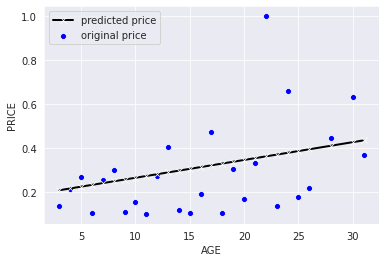

In [85]:
# Plot the predicted prices for wines as a function of their ages, holding all other variablesin the regression at their means.
x = wine_data["AGE"]
y_pred = -3.1716 + 0.0081* x + 0.1903 * 16.478148 - 0.001 * 144.814815 + 0.0006 * 608.407407	
y = wine_data["PRICE"]
fig, ax = plt.subplots()
sns.lineplot(x, y_pred, marker='x', color='black', linewidth=2, label="predicted price")
sns.scatterplot(x, y, marker="o", color='blue', label="original price")
sns.set_style("darkgrid")
plt.xlabel('AGE')
plt.ylabel('PRICE')
plt.show()
fig.savefig("/content/drive/My Drive/Colab Notebooks/Stat_II_probsets/price_age.png")

## Q3

---


Assume that a researcher has drawn each of the following conclusions based on the results of simple bivariate regressions with the specified dependent and independent variables. For each  one,  give  an  example  of  how  omitted  variable  bias  could  have  possibly  lead  to  an improper result. Specifically identify a variable that has been omitted and theorize about why and how it leads to a problem.
- (a)  People who own guns are more likely to be the victim of crime.
- (b)  Increased campaign spending by candidates results in lower vote shares in elections.
- (c)  Students who study more have lower grades.




---

### (a)
Because carrying and maintaining personal weapons cost a fortune, there is a possibility that people who own guns are richer than those who don't. Therefore, they are more likely to be exposed to robbery. To refine the model, I will add a new variable `personal_income` to test the relationship of richness and crime victime.

### (b)
Because of the persistent and increasing rich-poor gap, it is possible that more and more middle- and lower-class American voters dislike billionnairs who have the capacity to squader their fortune on campaigns. To test this hypothesis, I will include an `protest` variable into the model, which measures the occurrence of social movements against the rich. 

### (c)
Students who over-study may be in short of sleep, therefore perform less well in exams or other assessment schemes. I will include a `hours_of_sleep` variable to control for this situation. 

## Q4

---


Assume that the true model for the relationship between a country’s GDP per capita and level of corruption is 
$$GDP = \beta_{0} + \beta_{1}Corruption + \beta_{2}Globalization + \beta_{3}Inequality + \epsilon $$
But you estimate $$GDP = \beta_{0} + \beta_{1}Corruption + \epsilon $$
- (a) What is the expected value of $\beta_{1}$ in the restricted model?
- (b) What is the bias of $\beta_{1}$?
- (c) When will this bias be (approximately) zero?
- (d) What will make this bias smaller or larger? (discuss in substantive and formal terms)



---

Let $X, Y $ be the X, Y matrices of the restricted model $GDP = \beta_{0} + \beta_{1}Corruption + \epsilon $.

Let $Z$ be the matrix of the omitted `Globalization` and `Inequality` variables with a coefficient $\lambda$. 

Then the _true_ model generating our data is $$Y = X\beta_{1} + Z\lambda + \epsilon $$

The restricted model is $Y = X\beta_{1} + \tilde \epsilon $, where $\tilde \epsilon =  Z\lambda + \epsilon $. $\epsilon$ is the _true_ error of the model, therefore $E(\epsilon) = 0$.

The expected value of $\beta$

\begin{equation}
\begin{aligned}
\hat \beta_{1}  &= (X\prime X)^{-1}X\prime Y \\&= (X\prime X)^{-1}X\prime (X\beta_{1}  + (Z\lambda + \epsilon)) \\&= (X\prime X)^{-1}X\prime X\beta_{1}  +  (X\prime X)^{-1}X\prime Z\lambda + (X\prime X)^{-1}X\prime \epsilon \\&= \beta_{1}  + (X\prime X)^{-1}X\prime Z\lambda  + (X\prime X)^{-1}X\prime \epsilon
\end{aligned}
\end{equation}

Taking expectations

\begin{equation}
\begin{aligned}
E(\hat \beta_{1} ) &= E(\beta_{1} ) + E((X\prime X)^{-1}X\prime Z\lambda) + E((X\prime X)^{-1}X\prime \epsilon) \\&= \beta_{1}  + (X\prime X)^{-1}X\prime Z\lambda  + (X\prime X)^{-1}X\prime E(\epsilon) \\&= \beta_{1} + (X\prime X)^{-1}X\prime Z\lambda 
\end{aligned}
\end{equation}

Since $(X\prime X)^{-1}$ is positive (i.e., not equal), The bias is therefore equal to $(X\prime X)^{-1}X\prime Z\lambda $. 

The bias will be approximately zero when $X\prime Z\lambda=0$. We can sign the bias of our estimate by 
- looking at the correlations between incorporated variables `Corruption`  and omitted variables  `Globalization` and the `Inequality` 
    * i.e., the sign $X\prime Z$
- the correlations between Y `GDP` and omitted variables  `Globalization` and the `Inequality` 
    * i.e., the sign of $\lambda$

Therefore,

|$X\prime Z$ |$\lambda$   |$E(\hat \beta) - \beta$|$\beta$ is|
|:----------:|:----------:|:----------------------:|:---------:|
|positive (+)|positive (+)| positive (+)|over-estimated|
|negative (-)|negative (-)| positive (+)|over-estimated|
|positive (+)|negative (-)| negative (-)|under-estimated|
|negative (-)|positive (+)| negative (-)|under-estimated|

## Q5

---


Load the “`corruption.csv`” file on Canvas into `R`.
- (a) Estimate $\beta$ from a regression of gdp per capita (`gdppc`) on corruption.
- (b) Provide a brief explanation of your findings in substantive terms.
- (c) Estimate $\hat \beta$ from a regression of gdp per capita (`gdppc`) on corruption, globalization and inequality and report your results.
- (d) Provide a brief explanation of your findings in substantive terms.
- (e) How do the results from this new model compare to the results in part (a)?
- (f) Given what you know, do you think the model in part a violates the zero conditional mean assumption of OLS? Why or why not?
- (g) Is it appropriate to compare the $R^2$ for the models in parts (a) and (c)? Why or why not?



---
### (a)-(g)

*Effects of corruption, globalization and inequality on gdp per capita (gdppc)* 
![Regression table](https://drive.google.com/uc?id=1oW-Ku_HEIj5e5nMBXNIB5Y_uVGbsKA01)

Our main independent variable, `corruption`, is negatively corelated with `gdppc`. One unit increase in the corruption scale is associated with 844,748 USD decrease in GDP per capita. The coefficient is statistically significant at the 0.001 significance level, with a standard error of 66.206. 

If controlled for `globalization` and `inequality`, the effect of  `corruption` on `gdppc` halfed to -443,311, but it is still statistically significant at the 0.001 significance level, with a stand error of 86.099. `Globalization` is found to be positively corelated with the national wealth, with one unit increase on the globalization scale leads to 335.742 increase in GDP per capita. The coefficient is statistically significant at the 0.001 significance level, with a standard error of 88.848. `Inequality` is found to be negatively corelated with the national wealth, with one unit increase on the inequality scale leads to 1348.279 decrease in GDP per capita. The coefficient is statistically significant at the 0.1 significance level, with a standard error of 759.937. 

The zero-conditional mean assumption is violated in model (1). As the following figure indicates, errors are not randomly distributted, but approaches to zero as the `corruption` variable increases. 

![residual plot](https://drive.google.com/uc?id=19AVKuI8UFpT5DzPKHqpAwNqSmaxw_3ck)

`Corruption` itself can explain 51.4% percent of variations on `gdppc`. Adding `globalization` and `inequality`, model (2) can explain 62.3% percent of variations on `gdppc`; adjusted for the number of variables it can still explain 61.6% of variations on `gdppc`, which is still higher than model (1). Therefore model (2) has stronger explanatory power. 

Code starts below.


---





In [86]:
# load data
corruption_data =  pd.read_csv("/content/drive/My Drive/Colab Notebooks/Stat_II_probsets/corruption.csv")
corruption_data

,country,continent,contsize,contpop,eu,ethnic_frac,corruption,torture,globalization,envtreaties,envhealth,envperform,fragility,inequality,democracy,gdppc,population,econfreedom,deathrate,gdpgrowth,beaches,govteffect,noviolence,ruleoflaw
0,Afghanistan,asia,17212,4545133,0,0.769345,64.000626,4,32.171211,47,52.090000,39.700001,107.900001,7.2,3.083333,1282.6400,24988.090,48.900002,970.70001,3.933,0.922445,-1.331396,-2.411068,-1.445648
1,Albania,europe,3930,742648,0,0.220426,57.146229,6,60.653931,66,80.800003,72.360001,61.900002,4.2,8.083333,8516.7002,3215.990,66.900002,770.09998,1.827,0.047893,-0.085558,0.485986,-0.337862
2,Algeria,africa,11730,1287920,0,0.339400,60.690224,4,52.334721,82,76.220001,72.089996,79.599998,6.0,4.250000,5402.1699,36702.289,50.799999,406.39999,3.800,0.752228,-0.477553,-1.190535,-0.773168
3,Angola,africa,11730,1287920,0,0.786720,67.149948,4,40.037830,39,55.060001,50.919998,87.900002,9.6,3.250000,3771.2000,19618.430,47.700001,873.90002,4.804,0.428364,-1.123669,-0.333232,-1.118136
4,Argentina,south america,6890,428240,0,0.255000,63.824677,5,58.538410,114,94.279999,79.940002,47.599998,5.4,8.666666,15102.6100,40764.559,44.599998,808.29999,-2.513,0.352302,-0.159135,-0.005122,-0.886035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Uruguay,south america,6890,428240,0,0.250400,31.055574,7,66.627647,102,96.459999,74.239998,36.400002,4.2,10.000000,12804.8400,3380.010,69.300003,987.40002,3.239,0.142289,0.482786,0.991880,0.710575
152,Uzbekistan,asia,17212,4545133,0,0.412514,62.070217,3,39.428028,35,77.650002,64.769997,85.300003,7.0,0.250000,7370.7202,27760.270,46.500000,633.20001,8.000,1.645351,-0.628322,-0.273109,-1.129662
153,Venezuela,south america,6890,428240,0,0.496600,68.306488,3,51.118328,90,81.099998,77.570000,78.699997,6.7,5.166666,10513.9600,29436.891,36.299999,514.90002,-3.894,0.306087,-1.226764,-0.852002,-1.916324
154,Vietnam,asia,17212,4545133,0,0.238308,54.878067,3,56.685650,62,65.089996,56.810001,72.400002,5.5,1.583333,4147.5698,88792.000,50.799999,585.79999,5.984,0.111806,-0.070452,-0.022347,-0.359818


In [87]:
# estimate the coefficient of gdp per capita on corruption
gdppc_model1 = smf.ols(formula='gdppc ~ corruption', data=corruption_data).fit()
print(gdppc_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     162.8
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           6.73e-26
Time:                        20:32:09   Log-Likelihood:                -1675.5
No. Observations:                 156   AIC:                             3355.
Df Residuals:                     154   BIC:                             3361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.586e+04   3377.872     16.537      0.0

In [88]:
# regression of gdp per capita (gdppc) on corruption, globalization and inequality
gdppc_model2 = smf.ols(formula='gdppc ~ corruption + globalization + inequality', data=corruption_data).fit()
print(gdppc_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     83.79
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           4.79e-32
Time:                        20:32:10   Log-Likelihood:                -1655.7
No. Observations:                 156   AIC:                             3319.
Df Residuals:                     152   BIC:                             3332.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       2.38e+04   9775.519      2.435

In [89]:
# latex regression table
gdppc_mode_result = Stargazer([gdppc_model1, gdppc_model2])
Latex(gdppc_mode_result.render_latex())

<IPython.core.display.Latex object>

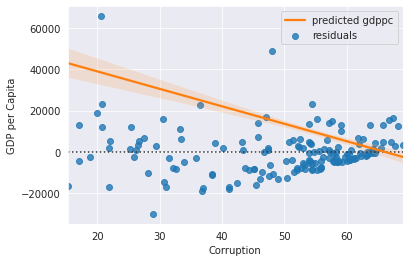

In [90]:
# x = wine_data["AGE"]
# y_pred = -3.1716 + 0.0081* x + 0.1903 * 16.478148 - 0.001 * 144.814815 + 0.0006 * 608.407407	
# y = wine_data["PRICE"]
fig, ax = plt.subplots()
sns.residplot("corruption", "gdppc", data = corruption_data, label = "residuals")
sns.regplot("corruption", "gdppc", data = corruption_data, scatter=False, label="predicted gdppc")
sns.set_style("darkgrid")
plt.xlabel('Corruption')
plt.ylabel('GDP per Capita')
plt.legend()
plt.show()
fig.savefig("/content/drive/My Drive/Colab Notebooks/Stat_II_probsets/curruption_gdppc_residuals.png")

## Q6

---


Assumptions:
- (a) Explain what each of the Gauss Markov assumptions mean in 1-2 sentences that would make sense to someone with limited knowledge of statistics. (Don’t just rewrite what I put on the slides. The goal is to express the assumptions in your own words.)
- (b) Violating which assumption(s) lead to biased coefficient estimates? Why?
- (c) Violating which assumption(s) lead to inefficient estimates? Why?
- (d) Why does it matter if $\hat \beta $ is normally distributed with mean $\beta $ and variance $\sigma^2 (X^\prime X)^{-1} $ for our research?



---

### (a) Gauss-Markov Assumptions
- Linearity
    * $Y = X\beta + \epsilon $, meaning the model must be linear in parameters ($\beta$)
- Zero-Conditional Mean
    * $E(\epsilon) = 0$, meaning errors on average cancel out for any value of $X$
    * $E(\epsilon|X) = 0$, meaning the disturbances of errors average out to 0 for any value of $X$
- Constant Variance
    * $Var(\epsilon) = \sigma^2I$, meaning the distribution of variance is constant, and the uncertanty of the model is identical for all observations
- Independent Errors
    * Error terms are pure noice and uncorrelated within eachother
    * Knowing anything about the error of observation $i$ doesn't tell us anything about the error of observation $j$
- No perfect collinearity
    * $X$ is non-stochastic and of full rank
    * $X$ is drew from repeated sampling not random sampling
    * independent variables can be _partially_ correlated with each other, no one independent variable can be fully explained by another 

### (b)(c) violations
- Coefficient $\beta$ is unbiased when $E(\hat \beta) = E(\beta + (X\prime X)^{-1} X\prime \epsilon) = \beta + (X\prime X)^{-1} X\prime E(\epsilon) = 0$. Biased coefficient estimates happen when
    * $Y \neq X\beta+ \epsilon$, or the linearity assumption is violated 
    * $E(\epsilon|X) \neq 0$, or the zero-condition mean is violated
    * $(X\prime X)^{-1} $ doesn't exist, or perfect collinearity exists between variables
- Coefficient $\beta$ is efficient when 
\begin{equation}
\begin{aligned}
plim \hat \beta &= plim (\beta + (X\prime X)^{-1} X\prime \epsilon) \\=& plim \beta + plim (\frac{1}{n}(X\prime X)^{-1}) + plim(\frac{1}{n}X\prime \epsilon) \\=& \beta + E((X\prime X))^{-1} (E(X\prime\epsilon)) \\=& \beta + E((X\prime X))^{-1} \\=& \beta 
\end{aligned}
\end{equation}
inefficient estimates happen when
    * $Y \neq X\beta+ \epsilon$, or the linearity assumption is violated 
    * $E(\epsilon|X) \neq 0$, or the zero-condition mean is violated
    * $(X\prime X)^{-1} $ doesn't exist, or perfect collinearity exists between variables

### (d) 
The OLS coefficient estimators are _asymptotically_ normally distributed (i.e., normally distributed in a large sample). Therefore we can use t and F tests for hypothesis testing in a large sample size. 